<h1>Problem Definition & Objectives</h1>

<h2>Objectives</h2>
<ul>
    <li>Build a trading algorithm using the SSL Indicator combined with a volume and momentum indicator</li>
    <li>Backtest the strategy on historical stock data and compare its performance with the S&P 500</li>
</ul>
<h2>Key Goals</h2>
<ul>
    <li>Develop a trading startegy that balances return and risk.</li>
    <li>Ensure the startegy is scalable, modular, and adheres to industry standards.</li>
</ul>

In [1]:
import yfinance as yf
import pandas as pd

# Fetch historical data for NVidia or SPY (S&P500 ETF)
data = yf.download('NVDA', start='2010-01-01', end='2024-09-09')

[*********************100%***********************]  1 of 1 completed


In [2]:
data.columns = data.columns.str.lower()

In [3]:
# Implement the SSL Semaphore Indicator for generating buy / sell signals
import talib
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

def calculate_moving_averages(df, high_col='high', low_col='low', period=10):
    """
    Calculate the moving averages for the high and low prices.

    Parameters:
    df (pd.DataFrame): DataFrame containing stock data
    high_col (str): Column name for high prices
    low_col (str): Column name for low prices
    period (int): Period for calculating moving averages

    Returns:
    pd.DataFrame: DataFrame with 'sma_high' and 'sma_low' columns added
    """
    df['sma_high'] = talib.SMA(df[high_col], timeperiod=period)
    df['sma_low'] = talib.SMA(df[low_col], timeperiod=period)
    return df

def generate_ssl_signals(df, close_col='close', sma_high_col='sma_high', sma_low_col='sma_low'):
    """
    Generate buy and sell signals based on crossovers between the closing price
    and the moving averages applied to the high and low prices.

    Parameters:
    df (pd.DataFrame): DataFrame containing stock data
    close_col (str): Column name for close prices
    sma_high_col (str): Column name for the high-based moving average
    sma_low_col (str): Column name for the low-based moving average

    Returns:
    pd.DataFrame: DataFrame with 'buy_signal' and 'sell_signal' columns added
    """
    df.loc[:,'buy_signal'] = np.where(df[close_col] > df[sma_high_col], 1, 0)
    df.loc[:,'sell_signal'] = np.where(df[close_col] < df[sma_low_col], -1, 0)
    return df

def plot_ssl_signals(df, close_col='close', sma_high_col='sma_high', sma_low_col='sma_low', buy_signal_col='buy_signal', sell_signal_col='sell_signal', start_date=None, end_date=None):
    """
    Plot the SSL semaphore signals along with the stock price and moving averages.

    Parameters:
    df (pd.DataFrame): DataFrame containing stock data
    close_col (str): Column name for close prices
    sma_high_col (str): Column name for the high-based moving average
    sma_low_col (str): Column name for the low-based moving average
    buy_signal_col (str): Column name for buy signals
    sell_signal_col (str): Column name for sell signals
    start_date (str or datetime): Start date for zooming into a particular time range
    end_date (str or datetime): End date for zooming into a particular time range
    """
    plt.figure(figsize=(12, 8))
    
    # Optionally filter the dataframe for the given date range
    if start_date and end_date:
        df = df[(df.index >= start_date) & (df.index <= end_date)]
    
    plt.plot(df[close_col], label='Close Price', color='black')
    plt.plot(df[sma_high_col], label='SMA High', color='green')
    plt.plot(df[sma_low_col], label='SMA Low', color='red')
    
    # Plot buy signals only where buy_signal == 1
    plt.scatter(df.index[df[buy_signal_col] == 1], df[close_col][df[buy_signal_col] == 1], 
                label='Buy Signal', marker='^', color='blue', alpha=1, s=100)
    
    # Plot sell signals only where sell_signal == -1
    plt.scatter(df.index[df[sell_signal_col] == -1], df[close_col][df[sell_signal_col] == -1], 
                label='Sell Signal', marker='v', color='red', alpha=1, s=100)

    plt.title('SSL Semaphore Signal Level')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()




/var/folders/hk/gs1pv6xn3pgb85r7g20122300000gn/T/ipykernel_19618/1530322219.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'buy_signal'] = np.where(df[close_col] > df[sma_high_col], 1, 0)
/var/folders/hk/gs1pv6xn3pgb85r7g20122300000gn/T/ipykernel_19618/1530322219.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'sell_signal'] = np.where(df[close_col] < df[sma_low_col], -1, 0)


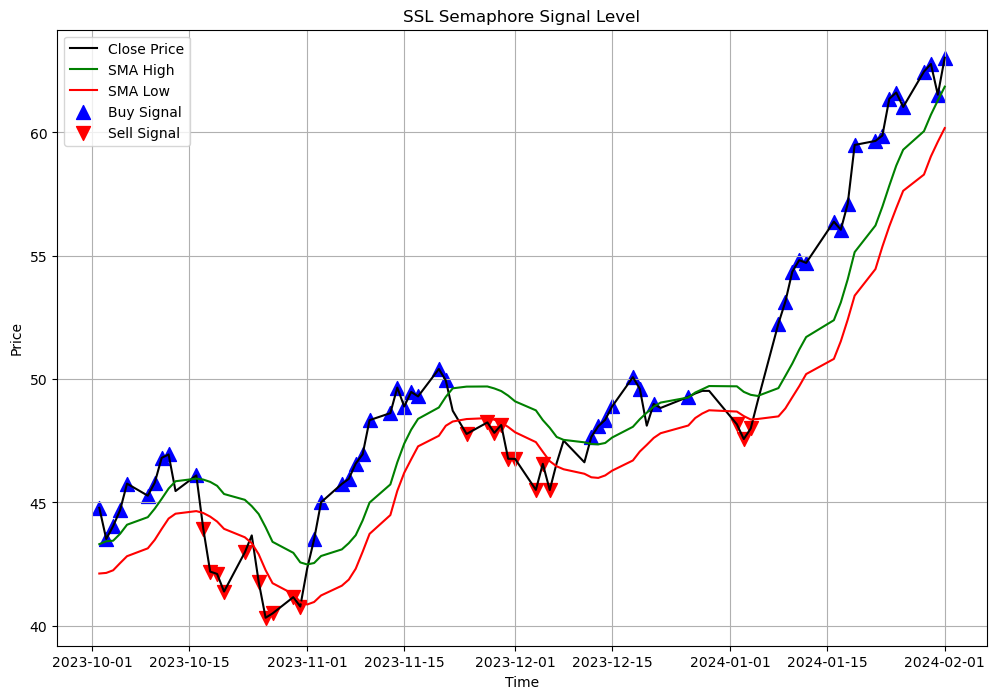

In [5]:
df = calculate_moving_averages(data)

df_cleaned = df.dropna()
df_cleaned

df_cleaned = generate_ssl_signals(df_cleaned)

plot_ssl_signals(df_cleaned, start_date='2023-10-01', end_date='2024-02-01')

In [46]:
# Volume Indicator (On-Balance Volume - OBV)
df_cleaned.loc[:, 'obv'] = talib.OBV(df_cleaned['close'], df_cleaned['volume'])

# Momentum Indicators (RSI and MACD)
df_cleaned.loc[:, 'rsi'] = talib.RSI(df_cleaned['close'], timeperiod=21)

# Assign MACD, signal, and histogram
df_cleaned.loc[:, 'macd'], df_cleaned.loc[:, 'macdsignal'], df_cleaned.loc[:, 'macdhist'] = talib.MACD(df_cleaned['close'], fastperiod=12, slowperiod=26, signalperiod=9)

df_cleaned = df_cleaned.dropna()
df_cleaned

,open,high,low,close,adj close,volume,sma_high,sma_low,buy_signal,sell_signal,obv,rsi,macd,macdsignal,macdhist,buy,sell
Date,,,,,,,,,,,,,,,,,
2010-04-22,0.408250,0.418000,0.402500,0.416750,0.382254,656932000,0.434800,0.422000,0,-1,2.713448e+09,45.496065,-0.003586,-0.001165,-0.002420,0,-1
2010-04-23,0.415500,0.416500,0.403750,0.411000,0.376980,752916000,0.433825,0.420500,0,-1,1.960532e+09,43.659359,-0.004689,-0.001870,-0.002819,0,0
2010-04-26,0.411500,0.420000,0.410750,0.415000,0.380649,491092000,0.432400,0.419125,0,-1,2.451624e+09,45.273143,-0.005181,-0.002532,-0.002649,0,-1
2010-04-27,0.412000,0.416250,0.402000,0.403250,0.369872,606704000,0.429725,0.416075,0,-1,1.844920e+09,41.598073,-0.006445,-0.003315,-0.003130,0,0
2010-04-28,0.403000,0.409750,0.395750,0.404000,0.370560,672164000,0.425375,0.411650,0,-1,2.517084e+09,41.914091,-0.007301,-0.004112,-0.003189,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,119.529999,121.750000,117.220001,119.370003,119.370003,333751600,128.455001,122.911000,0,-1,1.076249e+11,50.393902,2.114156,2.103284,0.010873,1,0
2024-09-03,116.010002,116.209999,107.290001,108.000000,108.000000,477155100,127.076001,121.298000,0,-1,1.071478e+11,43.958329,0.816717,1.845970,-1.029253,0,-1
2024-09-04,105.410004,113.269997,104.120003,106.209999,106.209999,372470300,125.415000,119.121001,0,-1,1.067753e+11,43.049547,-0.351895,1.406397,-1.758292,0,0


<h1>Optimal RSI Buy and RSI sell threshholds</h1>
<p>Maximizing the Sharpe Ratio or Cumulative Returns</p>
<h4>Hypothesis:</h4>
<p>Instead of using fixed levels ( RSI 30 for buy and RSI 70 for sell), aim to optimize these threshholds to improve the strategy's performance over historical data.</p>

In [71]:
# Feature engineering
# I attempt to optimize features below
df_cleaned.loc[:, 'rsi_buy'] = (df_cleaned['rsi'] < 30).astype(int)  # Buy if RSI < 30
df_cleaned.loc[:, 'rsi_sell'] = (df_cleaned['rsi'] > 70).astype(int)  # Sell if RSI > 70

df_cleaned = df_cleaned.drop(columns=['buy_signal', 'sell_signal'])

df_cleaned

KeyError: "['buy_signal', 'sell_signal'] not found in axis"

In [72]:
# Back Testing the RSI using Back Trader
# Sharpe Ratio
# Maximum Drawdown
# Cumulative Return
import backtrader as bt

class Backtest:
    """
    A class to handle backtesting using Backtrader.
    
    Attributes:
        strategy (bt.Strategy): The strategy class to be tested.
        data (pd.DataFrame): The historical data to be used for backtesting.
        cash (float): The initial capital.
        commission (float): The commission per trade.

    Methods:
        run_backtest(): Sets up the backtest and returns the cerebro engine for further analysis or plotting.
        plot_results(): Plots the results of the backtest using BackTrader's built in plot functionality.
        
    """
    
    def __init__(self, strategy, data, cash=10000, commission=0.001):
        """
        Initialize the Backtest class with strategy, data, cash, and commission.
        
        Parameters:
            strategy (bt.Strategy): A Backtrader strategy class.
            data (pd.DataFrame): Historical market data for backtesting.
            cash (float): Initial cash for backtesting. Default is 10,000.
            commission (float): Commission per trade. Default is 0.1%.
        """
        self.strategy = strategy
        self.data = data
        self.cash = cash
        self.commission = commission

    def run_backtest(self, **kwargs):
        """
        Execute the backtest with the provided strategy and data.

        Parameters: 
            **kwargs: Arguments to override the strategy parameters.
        
        Returns:
            cerebro: The Backtrader engine instance with the run results.
        """
        cerebro = bt.Cerebro()

        # Add the strategy to Cerebro
        cerebro.addstrategy(self.strategy)

        # Convert the DataFrame to Backtrader Data Feed
        data_feed = bt.feeds.PandasData(dataname=self.data)
        cerebro.adddata(data_feed)

        # Set initial cash
        cerebro.broker.setcash(self.cash)

        # Set commission
        cerebro.broker.setcommission(commission=self.commission)

        # Run the backtest
        results = cerebro.run()

        # Return the engine instance for further analysis or plotting
        return cerebro

    def plot_results(self, cerebro):
        """
        Plot the results of the backtest.
        
        Parameters:
            cerebro: The Backtrader engine instance with the run results.
        """
        cerebro.plot(style='candlestick')

class RSI_Strategy(bt.Strategy):
    """
    A simple RSI-based trading strategy.
    
    Attributes:
        rsi_period (int): The period for calculating RSI.
        rsi_buy (int): The RSI threshold for buying.
        rsi_sell (int): The RSI threshold for selling.

    Methods:
        next(): This method is called for every time step (data point).
    """
    
    params = (
        ('rsi_period', 14),  # Default RSI period
        ('rsi_buy', 30),     # Default RSI buy threshold
        ('rsi_sell', 70),    # Default RSI sell threshold
    )

    def __init__(self):
        """
        Initialize the strategy and indicators.
        """
        self.rsi = bt.indicators.RelativeStrengthIndex(self.data.close, period=self.params.rsi_period)

    def next(self):
        """
        This method is called on every time step (new data point) to evaluate
        the trading logic.
        """
        # Check if there are no open positions
        if not self.position:
            # Buy condition: RSI below the buy threshold
            if self.rsi < self.params.rsi_buy:
                self.buy()
        
        # Check if there is an open position
        else:
            # Sell condition: RSI above the sell threshold
            if self.rsi > self.params.rsi_sell:
                self.sell()

def fetch_data(ticker, start_date, end_date):
    """
    Fetch historical data using Yahoo Finance.
    
    Parameters:
        ticker (str): The stock ticker symbol (e.g., 'AAPL').
        start_date (str): The start date for the data in 'YYYY-MM-DD' format.
        end_date (str): The end date for the data in 'YYYY-MM-DD' format.
    
    Returns:
        pd.DataFrame: The historical data.
    """
    return yf.download(ticker, start=start_date, end=end_date)

def run_rsi_backtest(ticker, rsi_buy=30, rsi_sell=70):
    """
    Run a backtest on the specified ticker with the given RSI thresholds.
    
    Parameters:
        ticker (str): The stock ticker symbol (e.g., 'AAPL').
        rsi_buy (int): The RSI level below which to buy.
        rsi_sell (int): The RSI level above which to sell.
    
    Returns:
        cerebro: The Backtrader engine instance with the run results.
    """
    # Fetch historical data
    # start_date='2023-01-01', end_date='2024-09-01'
    data = fetch_data(ticker, '2023-01-01', '2024-09-01')

    # Define the RSI strategy with the chosen buy and sell levels
    strategy = RSI_Strategy
    
    # Create the backtest with the chosen strategy and data
    backtest = Backtest(strategy, data)

    # Run the backtest
    cerebro = backtest.run_backtest(rsi_buy=rsi_buy, rsi_sell=rsi_sell)

    # Get the initial and final portfolio values directly from Backtrader
    initial_value = backtest.cash  # Initial value is the cash we started with
    final_value = cerebro.broker.getvalue()  # Final portfolio value after the backtest

    # Calculate cumulative return
    cumulative_return = (final_value - initial_value) / initial_value * 100  # In percentage

    # Calculate Sharpe Ratio (you can refine this calculation)
    sharpe_ratio = (final_value - initial_value) / (data['Close'].std() * len(data) ** 0.5)  # Simple Sharpe Ratio

    # Plot the results
    backtest.plot_results(cerebro)

    return {
        'cumulative_return': cumulative_return,
        'sharpe_ratio': sharpe_ratio,
        'final_value': final_value
    }


In [73]:
# RSI levels as hyperparameters that need to be optimized, similar to how hyperparameters are tuned. 
# Grid Search or random search or Bayesian optimization

import itertools

# Define the range of RSI buy and sell levels to test
rsi_buy_levels = range(10, 50, 5)  # Buy if RSI < level (e.g., 10, 15, 20, ..., 45)
rsi_sell_levels = range(50, 90, 5)  # Sell if RSI > level (e.g., 50, 55, 60, ..., 85)

results = [] 

# Iterate over all combinations of RSI levels
for buy_level, sell_level in itertools.product(rsi_buy_levels, rsi_sell_levels):
    print(f"Testing Buy RSI: {buy_level}, Sell RSI: {sell_level}")
    performance = run_rsi_backtest('NVDA', rsi_buy=buy_level, rsi_sell=sell_level)

    # Store the performance metrics
    results.append({'buy_level': buy_level, 
                    'sell_level': sell_level, 
                    'performance': performance,
                    'cumulative_return': performance['cumulative_return'],
                    'sharpe_ratio': performance['sharpe_ratio'],
                    'final_value': performance['final_value']})

# Print the results
for result in results:
    print(result)

Testing Buy RSI: 10, Sell RSI: 50


[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 10, Sell RSI: 55



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 10, Sell RSI: 60



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 10, Sell RSI: 65



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 10, Sell RSI: 70



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 10, Sell RSI: 75



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 10, Sell RSI: 80



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 10, Sell RSI: 85



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 15, Sell RSI: 50



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 15, Sell RSI: 55



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 15, Sell RSI: 60



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 15, Sell RSI: 65



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 15, Sell RSI: 70



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 15, Sell RSI: 75



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 15, Sell RSI: 80



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 15, Sell RSI: 85



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 20, Sell RSI: 50



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 20, Sell RSI: 55



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 20, Sell RSI: 60



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 20, Sell RSI: 65



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 20, Sell RSI: 70



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 20, Sell RSI: 75



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 20, Sell RSI: 80



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 20, Sell RSI: 85



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 25, Sell RSI: 50



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 25, Sell RSI: 55



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 25, Sell RSI: 60



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 25, Sell RSI: 65



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 25, Sell RSI: 70



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 25, Sell RSI: 75



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 25, Sell RSI: 80



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 25, Sell RSI: 85



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 30, Sell RSI: 50



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 30, Sell RSI: 55



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 30, Sell RSI: 60



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 30, Sell RSI: 65



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 30, Sell RSI: 70



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 30, Sell RSI: 75



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 30, Sell RSI: 80



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 30, Sell RSI: 85



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 35, Sell RSI: 50



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 35, Sell RSI: 55



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 35, Sell RSI: 60



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 35, Sell RSI: 65



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 35, Sell RSI: 70



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 35, Sell RSI: 75



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 35, Sell RSI: 80



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 35, Sell RSI: 85



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 40, Sell RSI: 50



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 40, Sell RSI: 55



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 40, Sell RSI: 60



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 40, Sell RSI: 65



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 40, Sell RSI: 70



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 40, Sell RSI: 75



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 40, Sell RSI: 80



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 40, Sell RSI: 85



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 45, Sell RSI: 50



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 45, Sell RSI: 55



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 45, Sell RSI: 60



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 45, Sell RSI: 65



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 45, Sell RSI: 70



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 45, Sell RSI: 75



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 45, Sell RSI: 80



[*********************100%***********************]  1 of 1 completed

Testing Buy RSI: 45, Sell RSI: 85


{'buy_level': 10, 'sell_level': 50, 'performance': {'cumulative_return': 0.0, 'sharpe_ratio': 0.0, 'final_value': 10000.0}, 'cumulative_return': 0.0, 'sharpe_ratio': 0.0, 'final_value': 10000.0}
{'buy_level': 10, 'sell_level': 55, 'performance': {'cumulative_return': 0.0, 'sharpe_ratio': 0.0, 'final_value': 10000.0}, 'cumulative_return': 0.0, 'sharpe_ratio': 0.0, 'final_value': 10000.0}
{'buy_level': 10, 'sell_level': 60, 'performance': {'cumulative_return': 0.0, 'sharpe_ratio': 0.0, 'final_value': 10000.0}, 'cumulative_return': 0.0, 'sharpe_ratio': 0.0, 'final_value': 10000.0}
{'buy_level': 10, 'sell_level': 65, 'performance': {'cumulative_return': 0.0, 'sharpe_ratio': 0.0, 'final_value': 10000.0}, 'cumulative_return': 0.0, 'sharpe_ratio': 0.0, 'final_value': 10000.0}
{'buy_level': 10, 'sell_level': 70, 'performance': {'cumulative_return': 0.0, 'sharpe_ratio': 0.0, 'final_value': 10000.0}, 'cumulative_return': 0.0, 'sharpe_ratio': 0.0, 'final_value': 10000.0}
{'buy_level': 10, 'sell_l

In [74]:
# Optimize and Tune as needed

# Sort the results by Sharpe Ratio or Cumulative Return
# For Sharpe Ratio:
best_result_by_sharpe = max(results, key=lambda x: x['sharpe_ratio'])

# For Cumulative Return:
best_result_by_return = max(results, key=lambda x: x['cumulative_return'])

# Print the optimal RSI levels and their performance (by Sharpe Ratio)
print(f"Optimal Buy Level (Sharpe): {best_result_by_sharpe['buy_level']}, Optimal Sell Level (Sharpe): {best_result_by_sharpe['sell_level']}")
print(f"Sharpe Ratio: {best_result_by_sharpe['sharpe_ratio']}")
print(f"Cumulative Return: {best_result_by_sharpe['cumulative_return']}")
print(f"Final Portfolio Value: {best_result_by_sharpe['final_value']}")



Optimal Buy Level (Sharpe): 10, Optimal Sell Level (Sharpe): 50
Sharpe Ratio: 0.0
Cumulative Return: 0.0
Final Portfolio Value: 10000.0


In [63]:
# Strategy Implementation
# Signals SSL, Volume, and Momentum
# Define rules for buying, selling, and holding
# RSI, MACD

def generate_trading_signals(df):
    
    # Conditions for buying
    df.loc[:, 'buy'] = np.where((df['rsi'] < 10) & (df['macd'] > df['macdsignal']), 1, 0)
    
    # Conditions for selling
    df.loc[:, 'sell'] = np.where((df['rsi'] > 50) & (df['macd'] < df['macdsignal']), -1, 0)
    
    return df

def generate_macd_signals(df):
    # Conditions for buying
    df.loc[:, 'buy'] = np.where((df['macd'] > df['macdsignal']), 1, 0)
    
    # Conditions for selling
    df.loc[:, 'sell'] = np.where((df['macd'] < df['macdsignal']), -1, 0)
    
    return df

def generate_rsi_signals(df):
    # Conditions for buying
    df.loc[:, 'buy'] = np.where((df['rsi'] < 30), 1, 0)
    
    # Conditions for selling
    df.loc[:, 'sell'] = np.where((df['rsi'] > 50), -1, 0)

    return df
        


df_cleaned = generate_trading_signals(df_cleaned)
df_cleaned

,open,high,low,close,adj close,volume,sma_high,sma_low,obv,rsi,macd,macdsignal,macdhist,buy,sell,rsi_buy,rsi_sell
Date,,,,,,,,,,,,,,,,,
2010-04-22,0.408250,0.418000,0.402500,0.416750,0.382254,656932000,0.434800,0.422000,2.713448e+09,45.496065,-0.003586,-0.001165,-0.002420,0,0,0,0
2010-04-23,0.415500,0.416500,0.403750,0.411000,0.376980,752916000,0.433825,0.420500,1.960532e+09,43.659359,-0.004689,-0.001870,-0.002819,0,0,0,0
2010-04-26,0.411500,0.420000,0.410750,0.415000,0.380649,491092000,0.432400,0.419125,2.451624e+09,45.273143,-0.005181,-0.002532,-0.002649,0,0,0,0
2010-04-27,0.412000,0.416250,0.402000,0.403250,0.369872,606704000,0.429725,0.416075,1.844920e+09,41.598073,-0.006445,-0.003315,-0.003130,0,0,0,0
2010-04-28,0.403000,0.409750,0.395750,0.404000,0.370560,672164000,0.425375,0.411650,2.517084e+09,41.914091,-0.007301,-0.004112,-0.003189,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,119.529999,121.750000,117.220001,119.370003,119.370003,333751600,128.455001,122.911000,1.076249e+11,50.393902,2.114156,2.103284,0.010873,0,0,0,0
2024-09-03,116.010002,116.209999,107.290001,108.000000,108.000000,477155100,127.076001,121.298000,1.071478e+11,43.958329,0.816717,1.845970,-1.029253,0,0,0,0
2024-09-04,105.410004,113.269997,104.120003,106.209999,106.209999,372470300,125.415000,119.121001,1.067753e+11,43.049547,-0.351895,1.406397,-1.758292,0,0,0,0


<Figure size 1400x800 with 0 Axes>

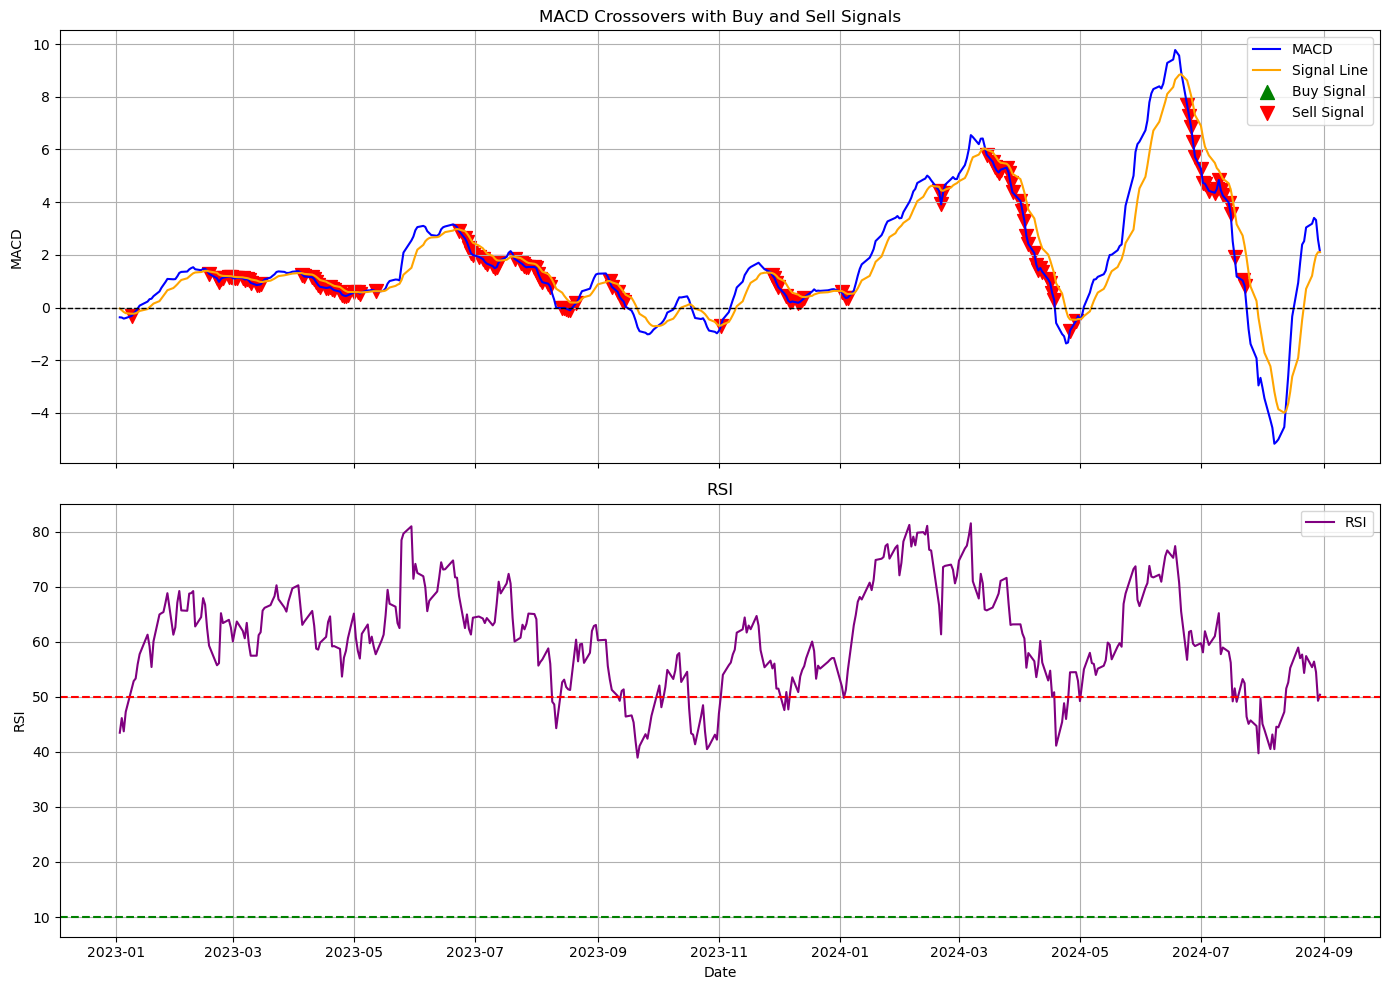

In [70]:
def plot_macd_rsi(df, start_date=None, end_date=None):
    """
    Plot MACD and RSI with buy and sell signals, and allow zooming by date range.

    Parameters:
    df (pd.DataFrame): DataFrame containing MACD, MACD Signal, buy and sell signals, RSI, etc.
    start_date (str or pd.Timestamp): Start date for the plot (optional)
    end_date (str or pd.Timestamp): End date for the plot (optional)
    """

     # Optionally filter the DataFrame for the given date range
    if start_date and end_date:
        df = df[(df.index >= pd.to_datetime(start_date)) & (df.index <= pd.to_datetime(end_date))]

    # Plotting MACD and Signal line with crossovers
    plt.figure(figsize=(14, 8))

    # Create subplots: 2 rows, 1 column
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
    
    # Plot MACD and Signal line on the first subplot (ax1)
    ax1.plot(df.index, df['macd'], label='MACD', color='blue')
    ax1.plot(df.index, df['macdsignal'], label='Signal Line', color='orange')

    # Highlight buy and sell signals on MACD plot
    ax1.scatter(df.index[df['buy'] == 1], df['macd'][df['buy'] == 1], label='Buy Signal', marker='^', color='green', s=100)
    ax1.scatter(df.index[df['sell'] == -1], df['macd'][df['sell'] == -1], label='Sell Signal', marker='v', color='red', s=100)

    # Add labels, legend, and title for MACD plot
    ax1.set_title('MACD Crossovers with Buy and Sell Signals')
    ax1.axhline(0, color='black', linestyle='--', linewidth=1)  # Horizontal line at MACD 0
    ax1.set_ylabel('MACD')
    ax1.legend()
    ax1.grid(True)

    # Plot RSI on the second subplot (ax2)
    ax2.plot(df.index, df['rsi'], label='RSI', color='purple')
    ax2.axhline(10, color='green', linestyle='--')  # RSI oversold line
    ax2.axhline(50, color='red', linestyle='--')    # RSI overbought line

    # Add labels, legend, and title for RSI plot
    ax2.set_title('RSI')
    ax2.set_ylabel('RSI')
    ax2.set_xlabel('Date')
    ax2.legend()
    ax2.grid(True)

    # Tight layout for better spacing
    plt.tight_layout()

    # Show plot
    plt.show()

plot_macd_rsi(df_cleaned, start_date='2023-01-01', end_date='2024-09-01')

Trade Analysis:
total: AutoOrderedDict([('total', 1), ('open', 1)])

Returns Analysis:
rtot: -inf
ravg: -inf
rnorm: -inf
rnorm100: -inf


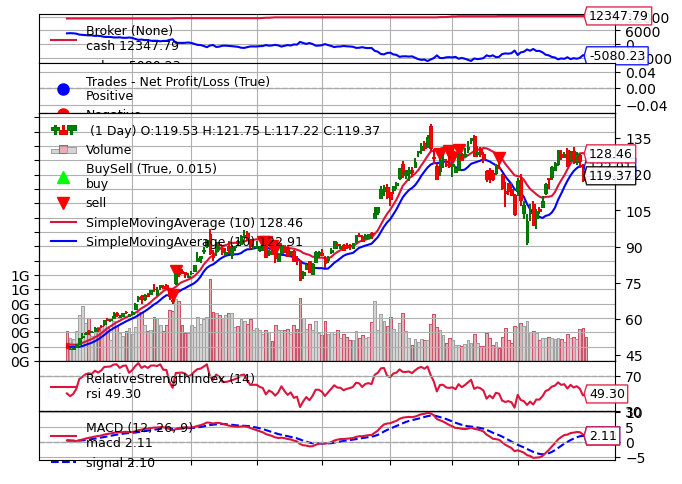

KeyError: 

In [67]:
# Back Testing using Back Trader Object Oriented 
import backtrader as bt
import backtrader.plot as bplot
import backtrader.analyzers as btanalyzers
from datetime import datetime
%matplotlib inline

# Define the SSL Strategy
class SSLStrategy(bt.Strategy):
    def __init__(self):
        # Define the indicators we want to use
        self.sma_high = bt.indicators.SimpleMovingAverage(self.data.high, period=10)
        self.sma_low = bt.indicators.SimpleMovingAverage(self.data.low, period=10)
        self.rsi = bt.indicators.RelativeStrengthIndex(self.data.close, period=14)
        self.macd = bt.indicators.MACD(self.data.close)

    # The next() method is called for every bar (daily, hourly, etc.)
    def next(self):
        # Buy condition: Close price above SMA high, RSI < X, and MACD > Signal
        if self.data.close > self.sma_high and self.rsi < 10 and self.macd.macd > self.macd.signal:
            self.buy()

        # Sell condition: Close price below SMA low, RSI > X, and MACD < Signal
        elif self.data.close < self.sma_low and self.rsi > 50 and self.macd.macd < self.macd.signal:
            self.sell()

# Initialize Backtrader
cerebro = bt.Cerebro()

# Add the SSL Strategy to Backtrader
cerebro.addstrategy(SSLStrategy)

# Convert the pandas DataFrame into Backtrader Data Feed
data_feed = bt.feeds.PandasData(dataname=df_cleaned)

# Add the data feed to Backtrader
cerebro.adddata(data_feed)

# Add analyzers to Backtrader
cerebro.addanalyzer(btanalyzers.TradeAnalyzer, _name='trade_analyzer')
cerebro.addanalyzer(btanalyzers.Returns, _name='returns')

# Run the backtest
results = cerebro.run()

# Accessing the results of the analyzers
trade_analyzer = results[0].analyzers.trade_analyzer.get_analysis()
returns_analyzer = results[0].analyzers.returns.get_analysis()

# Print the trade analysis
print("Trade Analysis:")
for key, value in trade_analyzer.items():
    print(f"{key}: {value}")

# Print the returns analysis
print("\nReturns Analysis:")
for key, value in returns_analyzer.items():
    print(f"{key}: {value}")



start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 9, 1)

# Generate the plot with Backtrader
cerebro.plot(iplot=False, style='candlestick', volume=True, barup='green', bardown='red',start=start_date, end=end_date)  # This returns a list of figures

# Print trade statistics
print(f"Total Trades: {trade_analyzer.total.closed}")
print(f"Winning Trades: {trade_analyzer.won.total}")
print(f"Losing Trades: {trade_analyzer.lost.total}")
print(f"Total PnL: {trade_analyzer.pnl.net.total}")
print(f"Strike Rate: {trade_analyzer.won.total / trade_analyzer.total.closed * 100:.2f}%")

# Print returns statistics
print(f"Total Return: {returns_analyzer.rnorm100}%")





In [28]:
# Export Trade To CSV or Data Frame for futher analysis 

# After running the backtest, you can extract trade data from TradeAnalyzer
trade_list = []

for trade in results[0].analyzers.trade_analyzer.get_analysis().closed:
    trade_data = {
        'Date': trade.dtclose,
        'Entry Price': trade.pricein,
        'Exit Price': trade.priceout,
        'Profit/Loss': trade.pnl,
        'Commission': trade.commission,
        'Size': trade.size
    }
    trade_list.append(trade_data)

# Convert to DataFrame
df_trades = pd.DataFrame(trade_list)
df_trades.head()


KeyError: 